X[0]: [-1.94946404 -1.72762137 -1.44322653 -1.25816053 -1.37035555 -0.87919747
 -0.92564929 -0.65677209 -0.76733563 -0.62139023 -0.290244   -0.22686468
 -0.60273539 -0.00239078 -0.08480746 -0.00306752  0.23418808  0.26228053
  0.44830317  0.54854272  0.81791095  0.71053487  1.02254208  1.00017311
  1.08154979  1.35288792  0.98401601  1.34033059  1.52126445  1.48475828]
X[1]: [-1.10232671 -1.08918054 -1.08065289 -1.06860216 -1.04058941 -1.01107791
 -0.9521268  -0.90122118 -0.85917606 -0.77819761 -0.72275344 -0.62431954
 -0.53950769 -0.44520941 -0.33917551 -0.24029817 -0.10420633  0.00982608
  0.15304784  0.29900701  0.43956643  0.59282477  0.76498734  0.93138376
  1.12168547  1.31529499  1.5005204   1.71355976  1.9270642   2.1298533 ]
y: [-1.09864238 -1.0932503  -1.08296801 -1.06145295 -1.03643893 -1.00223992
 -0.9572442  -0.90995918 -0.8514937  -0.78711244 -0.71385116 -0.63008838
 -0.54437872 -0.4481603  -0.34467598 -0.23085553 -0.11186816  0.0152672
  0.14983136  0.29202587  0.4437439

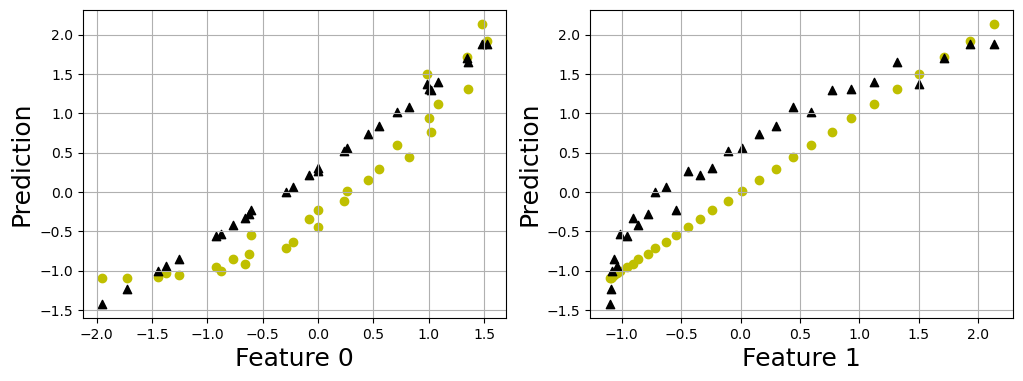

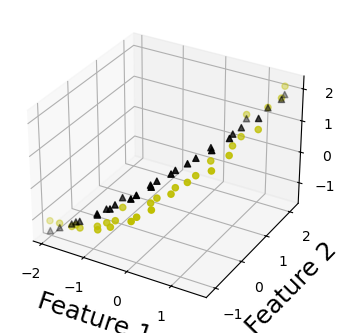

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np

def gradient_regression(X,y,alpha,b,w):
    dw1 = 0.0; dw2 = 0.0; db = 0.0 # Se inicializan las derivadas parciales a cero, alli se acumula la contribucion de cada
                                   # dato al gradiente.
    for i in range(len(X[0])):                  # Se itera sobre cada dato en x. Donde "x" representa los datos e "y" los valores objetivo.
        aux = -2.0 * (y[i] - (w[0]*X[0][i] + w[1]*X[1][i] + b))# Para cada punto de datos se calcula aux quien indica la
                                                               # contribucion de ese punto especifico dentro del gradiente.
                                                               # La contribucion se calcula usando la derivada parcial de la
                                                               #  funcion de perdida  respecto a los parámetros (w[0], w[1], y b)
                                                               #  evaluada en ese punto de datos específico.
        db = db + aux
        dw1 = dw1 + X[0][i]*aux # SE ALMACENAN LAS DERIVADAS PARCIALES SUMANDO LA CONTRIBUCION DE CADA PUNTO DE DATOS AL GRADIENTE
        dw2 = dw2 + X[1][i]*aux
# Después de iterar sobre todos los puntos de datos, se actualizan los parámetros (w[0], w[1], y b) utilizando el gradiente acumulado y
# el tamaño de paso (alpha). Esto se hace mediante la regla de actualización del descenso del gradiente, donde cada parámetro se actualiza
# en la dirección opuesta al gradiente con un tamaño de paso proporcionado por alpha.
    aux = 1.0/float(len(X[0])) # Normalizacion del gradiente acumulado. Se normaliza con el fin de estabilizar el entrenamiento
                               # sin esta normalizacion el tamaño del paso podria tener un impacto desproporcionado en el entrenamiento.
    b = b - aux * db * alpha
    w[0] = w[0] - aux * dw1 * alpha
    w[1] = w[1] - aux * dw2 * alpha
    return b, w

def normalize(x):
    mean = np.mean(x)
    s_dev = np.std(x)
    y = (x-mean)/s_dev
    return y


if __name__ == "__main__":
    np.random.seed(10)
    X = [[],[]]
    y = []
    result = []

    for i in range(30):
        X[0].append(i + random.random()*5)
        X[1].append(i**2 + random.random()*5)
        y.append((i**2 + random.random()+50))

    X[0] = normalize(X[0])
    X[1] = normalize(X[1])
    y = normalize(y)

    print("X[0]:", X[0])
    print("X[1]:", X[1])
    print("y:", y)

    alpha = 0.1
    b = random.random()
    w = np.random.rand(2,1);
    w = np.array(w)

    epochs = 4

    for i in range(epochs):
        b,w = gradient_regression(X, y, alpha, b, w)
    result = w.T@X+b    #w.T Es la matriz transpuesta de los pesos
                        # @ Operador de multiplicacion de matrices en python

    fig,axs = plt.subplots(1,2,figsize=(12,4))
    for i in [0,1]:
        axs[i].scatter(X[i],y,c='y',marker='o')
        axs[i].scatter(X[i],result,c='k',marker='^')
        axs[i].set_xlabel('Feature '+ str(i),fontsize=18)
        axs[i].set_ylabel('Prediction',fontsize=18)
        axs[i].grid()

    fig = plt.figure(figsize=(8, 4))
    axs = fig.add_subplot(111, projection='3d')
    axs.scatter(X[0], X[1], y, c='y', marker='o')
    axs.scatter(X[0], X[1], result, c='k', marker='^')
    axs.set_xlabel('Feature 1', fontsize=18)
    axs.set_ylabel('Feature 2', fontsize=18)
    axs.set_zlabel('y', fontsize=18)
    axs.grid()
    
    plt.show()

        
